In [ ]:
# problem preperation
#Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import Normalizer
from pandas.plotting import scatter_matrix

In [35]:
# load dataset
df = pd.read_csv("Detection.csv")

In [36]:
#Data Summarization

In [37]:
#shape
print(df.shape)
print(df.columns)

(6995, 6)
Index(['Computer Time', 'Time (Milli Sec.)', 'GSR', 'BPM', 'Temperature',
       'EMOTIONAL AFFIRM'],
      dtype='object')


In [38]:
#Checking for Null(NaN) values
df.isnull().sum()

Computer Time        13
Time (Milli Sec.)    13
GSR                  13
BPM                  13
Temperature          13
EMOTIONAL AFFIRM     13
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Computer Time        0
Time (Milli Sec.)    0
GSR                  0
BPM                  0
Temperature          0
EMOTIONAL AFFIRM     0
dtype: int64

In [7]:
#types
print(df.dtypes)

Computer Time         object
Time (Milli Sec.)    float64
GSR                  float64
BPM                  float64
Temperature          float64
EMOTIONAL AFFIRM      object
dtype: object


In [8]:
#head
df.head()

,Computer Time,Time (Milli Sec.),GSR,BPM,Temperature,EMOTIONAL AFFIRM
0,22:35:38,8937.0,482.0,66.0,21.97,RELAXED
1,22:35:38,9150.0,480.0,66.0,31.74,RELAXED
2,22:35:39,9362.0,481.0,66.0,23.93,RELAXED
3,22:35:39,9575.0,483.0,70.0,37.11,RELAXED
4,22:35:39,9787.0,479.0,70.0,23.93,RELAXED


In [9]:
#Descriptive statistics

In [10]:
print(df.describe())

       Time (Milli Sec.)          GSR          BPM  Temperature
count       6.982000e+03  6982.000000  6982.000000  6982.000000
mean        4.633324e+05   437.525637    96.815812    27.899487
std         2.705281e+05   104.307760    14.144633    19.234574
min         8.937000e+03   139.000000    65.000000     6.350000
25%         2.450458e+05   352.000000    86.000000    23.440000
50%         4.308305e+05   485.000000    96.000000    25.880000
75%         6.039202e+05   530.000000   106.000000    28.810000
max         1.106392e+06   599.000000   135.000000   477.540000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6982 entries, 0 to 6994
Data columns (total 6 columns):
Computer Time        6982 non-null object
Time (Milli Sec.)    6982 non-null float64
GSR                  6982 non-null float64
BPM                  6982 non-null float64
Temperature          6982 non-null float64
EMOTIONAL AFFIRM     6982 non-null object
dtypes: float64(4), object(2)
memory usage: 381.8+ KB


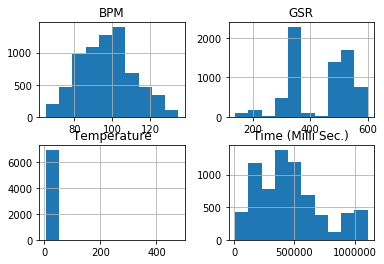

In [12]:
#histogram
df.hist()
plt.show()

In [13]:
#how many categories we have?
df['EMOTIONAL AFFIRM'].unique()

array(['RELAXED', 'SAD', 'HAPPY', 'ANGRY'], dtype=object)

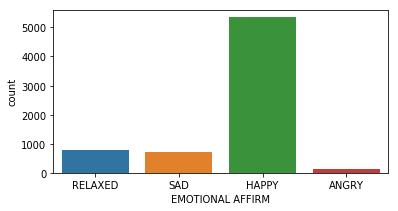

In [14]:
plt.figure(figsize = (6,3))
sns.countplot(df['EMOTIONAL AFFIRM'])
plt.show()

In [15]:
df['EMOTIONAL AFFIRM'].value_counts()

HAPPY      5339
RELAXED     782
SAD         724
ANGRY       137
Name: EMOTIONAL AFFIRM, dtype: int64

In [16]:
df.isnull().sum() #no missing values

Computer Time        0
Time (Milli Sec.)    0
GSR                  0
BPM                  0
Temperature          0
EMOTIONAL AFFIRM     0
dtype: int64

In [18]:
#split into features and labels sets
X = df.drop(['Computer Time','EMOTIONAL AFFIRM'],axis = 1) #features
y = df['EMOTIONAL AFFIRM'] #labels

In [19]:
X.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6982 entries, 0 to 6994
Data columns (total 4 columns):
Time (Milli Sec.)    6982 non-null float64
GSR                  6982 non-null float64
BPM                  6982 non-null float64
Temperature          6982 non-null float64
dtypes: float64(4)
memory usage: 592.7 KB


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
m1.fit(X_train, y_train)
pred1=m1.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(classification_report(y_test, pred1))

             precision    recall  f1-score   support

      ANGRY       0.00      0.00      0.00        39
      HAPPY       0.80      1.00      0.89      1609
    RELAXED       1.00      0.28      0.43       225
        SAD       0.44      0.07      0.12       222

avg / total       0.77      0.80      0.74      2095



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
# labels = ['angry', 'Relaxed', 'sad','Angry']
labels = ['Relaxed','Happy','Sad','Angry']
cm1 = pd.DataFrame(confusion_matrix(y_test, pred1), index = labels, columns = labels)

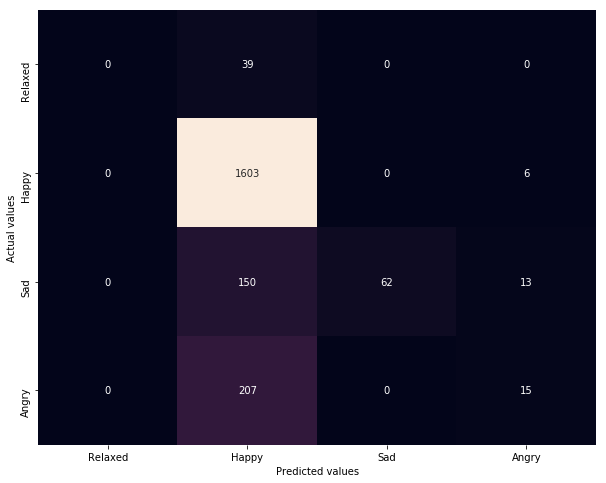

In [25]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [26]:
# Since in the above Confusion Matrix we got the highest correlation for the emotiom Happy we can conclude that the particular person is in state of HAPPY

# Support Vector Machine

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [28]:
grid = {
    'C': [1, 5, 50],
    'gamma': [0.05, 0.1, 0.5, 1, 5]
}

m5 = GridSearchCV(SVC(), grid)
m5.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 50], 'gamma': [0.05, 0.1, 0.5, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
m5.best_params_ 

{'C': 1, 'gamma': 0.05}

In [30]:
pred5 = m5.predict(X_test)
print(classification_report(y_test, pred5))

             precision    recall  f1-score   support

      ANGRY       0.00      0.00      0.00        39
      HAPPY       0.77      1.00      0.87      1609
    RELAXED       0.00      0.00      0.00       225
        SAD       0.00      0.00      0.00       222

avg / total       0.59      0.77      0.67      2095



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


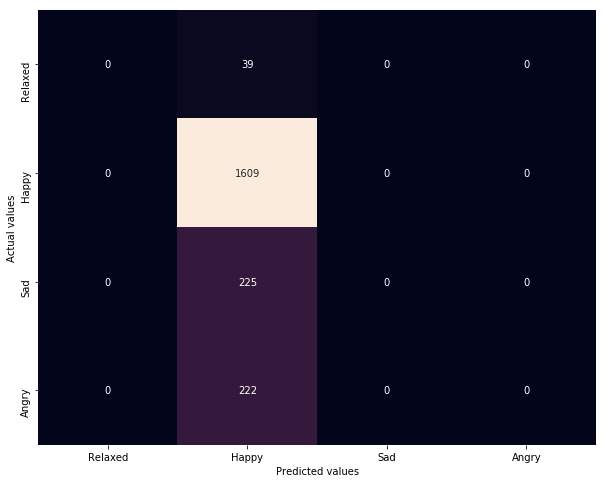

In [31]:
cm5 = pd.DataFrame(confusion_matrix(y_test, pred5), index = labels, columns = labels)

plt.figure(figsize = (10, 8))
sns.heatmap(cm5, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

# Naive Bayes Algorithm

In [32]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
m4=GaussianNB()
m4.fit(X_train, y_train)
pred4=m4.predict(X_test)
print(classification_report(y_test, pred4))

             precision    recall  f1-score   support

      ANGRY       0.83      0.49      0.61        39
      HAPPY       0.95      0.87      0.91      1609
    RELAXED       0.92      0.25      0.39       225
        SAD       0.36      0.86      0.51       222

avg / total       0.88      0.80      0.81      2095



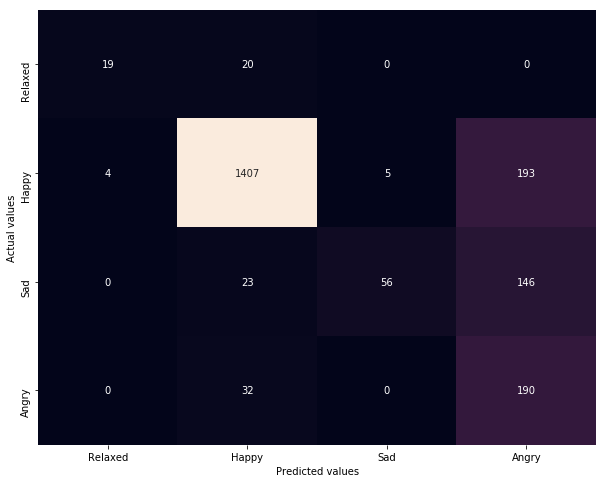

In [33]:
cm6 = pd.DataFrame(confusion_matrix(y_test, pred4), index = labels, columns = labels)

plt.figure(figsize = (10, 8))
sns.heatmap(cm6, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()